In [199]:
# 1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew

In [200]:
# 2
df = pd.read_csv('pokemon.csv')

In [201]:
# 3
df.shape

(800, 13)

In [202]:
# 4
list(df.columns)

['#',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [203]:
# 5
pm_df = df.drop('#', inplace=False, axis=1)
pm_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [204]:
# 6
print(list(pm_df['Type 1'].unique()))

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


In [205]:
# 7
name_lst = list(pm_df['Name'])
mega_lst = [pkmn for pkmn in name_lst if 'mega' in pkmn.lower()]
temp = df[df['Name'].isin(mega_lst)]['#']
len(temp.unique())

48

In [206]:
# 8
sdef_arr = np.array(pm_df['Sp. Def'])
np.std(sdef_arr)

27.81151728600941

In [207]:
# 9
lgnd_df = list(pm_df['Legendary']==True)
perc_lgnd = sum(lgnd_df) / len(lgnd_df) * 100
print(f'{perc_lgnd:.3f}%')

8.125%


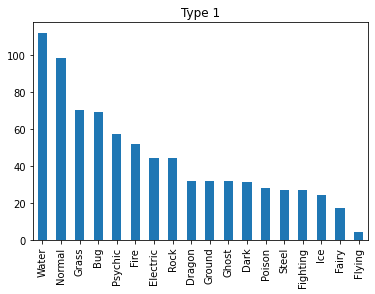

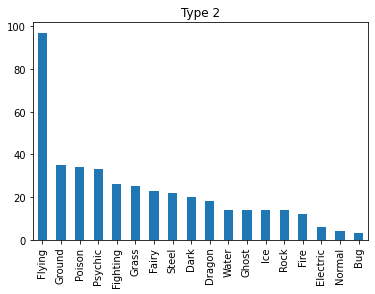

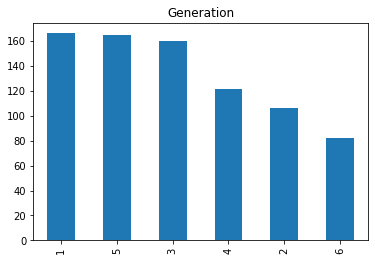

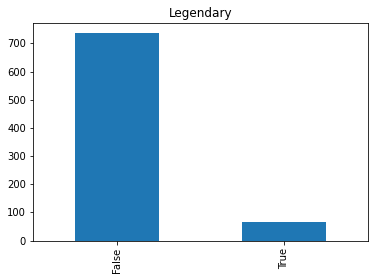

In [208]:
# 10a
for col in ['Type 1', 'Type 2', 'Generation', 'Legendary']:
  pm_df[col].value_counts().plot.bar()
  plt.title(col)
  plt.show()
# for discrete variables, bargraph will be a better choice in my opinion

# 10b
# from the plots, the mode values are
# Type 1: Water
# Type 2: Flying
# Generation: 1
# Legendary: False

In [209]:
# 11a
def cont(nm):
  arr = np.array(pm_df[nm])
  mean = np.mean(arr)
  var = np.var(arr)
  skw = skew(arr)
  mn = min(arr)
  mx = max(arr)
  median = np.median(arr)
  p25 = np.percentile(arr, 25)
  p75 = np.percentile(arr, 75)
  iqr = p75 - p25
  return (mean, var, skw, mn, mx, median, p25, p75, iqr)

cont_stt = pd.DataFrame(columns=['Mean', 'Variance', 'Skew', 'Minimum', 'Maximum', 'Median', '25th', '75th', 'IQR'])

for col in ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
  cont_stt.loc[col] = cont(col)

cont_stt

,Mean,Variance,Skew,Minimum,Maximum,Median,25th,75th,IQR
Total,435.10250,14373.141994,0.152244,180.0,780.0,450.0,330.00,515.0,185.00
HP,69.25875,651.204298,1.565282,1.0,255.0,65.0,50.00,80.0,30.00
Attack,79.00125,1052.163748,0.550579,5.0,190.0,75.0,55.00,100.0,45.00
Defense,73.84250,971.195194,1.153744,5.0,230.0,70.0,50.00,90.0,40.00
Sp. Atk,72.82000,1069.410100,0.743266,10.0,194.0,65.0,49.75,95.0,45.25
Sp. Def,71.90250,773.480494,0.852416,20.0,230.0,70.0,50.00,90.0,40.00
Speed,68.27750,843.455494,0.357262,5.0,180.0,65.0,45.00,90.0,45.00


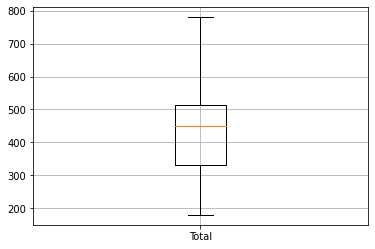

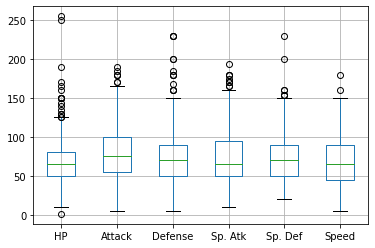

In [210]:
# 11b
plt.boxplot(pm_df['Total'])
plt.xticks([1], ['Total'])
plt.grid()
plt.show()
cont_var = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
cont_df = pm_df[cont_var]
cont_df.boxplot()
plt.show()

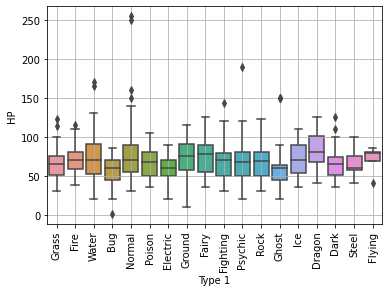

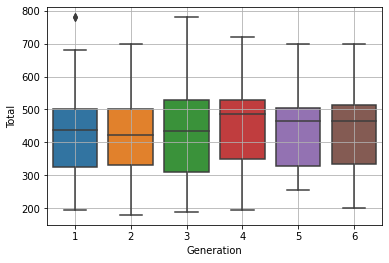

In [211]:
# 12a

# pair 1: type 1 and hp
# plt.figure(figsize=(10,7))
sns.boxplot(x='Type 1', y='HP', data=pm_df)
plt.xticks(rotation=90)
plt.grid()
plt.show()

# pair 1: generation and total
sns.boxplot(x='Generation', y='Total', data=pm_df)
plt.grid()
plt.show()

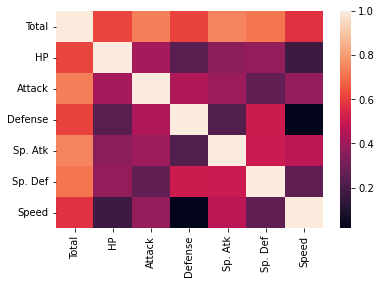

In [212]:
# 12b
cont_var = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
cont_df = pm_df[cont_var]
sns.heatmap(cont_df.corr())